# Does a host country win more medals ?

To answer this question, we are using The Guardian's Olympic medal dataset : https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data

## Importing library

In [31]:
#Import pandas
import pandas as pd

# Import pyplot
import matplotlib.pyplot as plt

## Loading Olympic edition DataFrame

Our first task here is to prepare a DataFrame editions from a tab-separated values (TSV) file.

Initially, editions has 26 rows (one for each Olympic edition, i.e., a year in which the Olympics was held) and 7 columns: 'Edition', 'Bronze', 'Gold', 'Silver', 'Grand Total', 'City', and 'Country'.

For the analysis that follows, we won't need the overall medal counts, so we want to keep only the useful columns from editions: 'Edition', 'Grand Total', City, and Country.

In [5]:
# Create file path: file_path
file_path = 'Summer Olympic medallists 1896 to 2008 - EDITIONS.tsv'

# Load DataFrame from file_path: editions
editions = pd.read_csv(file_path, sep='\t')

# Extract the relevant columns: editions
editions = editions[['Edition', 'Grand Total', 'City', 'Country']]

# Print editions DataFrame
print(editions)

    Edition  Grand Total         City                     Country
0      1896          151       Athens                      Greece
1      1900          512        Paris                      France
2      1904          470    St. Louis               United States
3      1908          804       London              United Kingdom
4      1912          885    Stockholm                      Sweden
5      1920         1298      Antwerp                     Belgium
6      1924          884        Paris                      France
7      1928          710    Amsterdam                 Netherlands
8      1932          615  Los Angeles               United States
9      1936          875       Berlin                     Germany
10     1948          814       London              United Kingdom
11     1952          889     Helsinki                     Finland
12     1956          885    Melbourne                   Australia
13     1960          882         Rome                       Italy
14     196

## Loading IOC codes DataFrame

Our task here is to prepare a DataFrame ioc_codes from a comma-separated values (CSV) file.

Initially, ioc_codes has 200 rows (one for each country) and 3 columns: 'Country', 'NOC', & 'ISO code'.

For the analysis that follows, we want to keep only the useful columns from ioc_codes: 'Country' and 'NOC' (the column 'NOC' contains three-letter codes representing each country).

In [12]:
# Create the file path: file_path
file_path = 'Summer Olympic medallists 1896 to 2008 - IOC COUNTRY CODES.csv'

# Load DataFrame from file_path: ioc_codes
ioc_codes = pd.read_csv(file_path)

# Extract the relevant columns: ioc_codes
ioc_codes = ioc_codes[['Country', 'NOC']]

# Print first and last 5 rows of ioc_codes
print(ioc_codes.head())
print(ioc_codes.tail())

           Country  NOC
0      Afghanistan  AFG
1          Albania  ALB
2          Algeria  ALG
3  American Samoa*  ASA
4          Andorra  AND
             Country  NOC
196          Vietnam  VIE
197  Virgin Islands*  ISV
198            Yemen  YEM
199           Zambia  ZAM
200         Zimbabwe  ZIM


## Loading medals DataFrame

Now we want to prepare a DataFrame medals from a CSV file with ';' as separator.

Initially, medals has 29217 rows (one for each medal won) and 10 columns.
For the analysis that follows, we want to keep only the useful columns from medals: 'Edition', 'Athlete', 'NOC' and 'Medal' (the column 'NOC' contains three-letter codes representing each country).

In [24]:
# Create the file path: file_path
file_path = 'Summer Olympic medallists 1896 to 2008 - MEDALS.csv'

# Load DataFrame from file_path: medals
medals = pd.read_csv(file_path, sep=';')

# Extract relevant columns: medals
medals = medals[['Edition', 'Athlete', 'NOC', 'Medal']]
    
# Print first and last 5 rows of medals
print(medals.head())
print(medals.tail())


   Edition             Athlete  NOC   Medal
0     1896       HAJOS, Alfred  HUN    Gold
1     1896    HERSCHMANN, Otto  AUT  Silver
2     1896   DRIVAS, Dimitrios  GRE  Bronze
3     1896  MALOKINIS, Ioannis  GRE    Gold
4     1896  CHASAPIS, Spiridon  GRE  Silver
       Edition               Athlete  NOC   Medal
29211     2008        ENGLICH, Mirko  GER  Silver
29212     2008  MIZGAITIS, Mindaugas  LTU  Bronze
29213     2008       PATRIKEEV, Yuri  ARM  Bronze
29214     2008         LOPEZ, Mijain  CUB    Gold
29215     2008        BAROEV, Khasan  RUS  Silver


## Counting medals by country/edition in a pivot table

We construct a pivot table to see the number of medals each country won in each year. The result is a new DataFrame with the Olympic edition on the Index and with 138 country NOC codes as columns.

In [25]:
# Construct the pivot_table: medal_counts
medal_counts = medals.pivot_table(index='Edition', values='Athlete', columns='NOC', aggfunc='count')

# Print the first & last 5 rows of medal_counts
print(medal_counts.head())
print(medal_counts.tail())

NOC      AFG  AHO  ALG   ANZ  ARG  ARM  AUS   AUT  AZE  BAH  ...   URS  URU  \
Edition                                                      ...              
1896     NaN  NaN  NaN   NaN  NaN  NaN  2.0   5.0  NaN  NaN  ...   NaN  NaN   
1900     NaN  NaN  NaN   NaN  NaN  NaN  5.0   6.0  NaN  NaN  ...   NaN  NaN   
1904     NaN  NaN  NaN   NaN  NaN  NaN  NaN   1.0  NaN  NaN  ...   NaN  NaN   
1908     NaN  NaN  NaN  19.0  NaN  NaN  NaN   1.0  NaN  NaN  ...   NaN  NaN   
1912     NaN  NaN  NaN  10.0  NaN  NaN  NaN  14.0  NaN  NaN  ...   NaN  NaN   

NOC        USA  UZB  VEN  VIE  YUG  ZAM  ZIM   ZZX  
Edition                                             
1896      20.0  NaN  NaN  NaN  NaN  NaN  NaN   6.0  
1900      55.0  NaN  NaN  NaN  NaN  NaN  NaN  34.0  
1904     394.0  NaN  NaN  NaN  NaN  NaN  NaN   8.0  
1908      63.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
1912     101.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  

[5 rows x 138 columns]
NOC      AFG  AHO  ALG  ANZ   ARG  ARM    AUS  AUT 

## Computing fraction of medals per Olympic edition

In [26]:
# Set Index of editions: totals
totals = editions.set_index('Edition')

# Reassign totals['Grand Total']: totals
totals = totals['Grand Total']

# Divide medal_counts by totals: fractions
fractions = medal_counts.divide(totals, axis='rows')

# Print first & last 5 rows of fractions
print(fractions.head())
print(fractions.tail())

NOC      AFG  AHO  ALG       ANZ  ARG  ARM       AUS       AUT  AZE  BAH  \
Edition                                                                    
1896     NaN  NaN  NaN       NaN  NaN  NaN  0.013245  0.033113  NaN  NaN   
1900     NaN  NaN  NaN       NaN  NaN  NaN  0.009766  0.011719  NaN  NaN   
1904     NaN  NaN  NaN       NaN  NaN  NaN       NaN  0.002128  NaN  NaN   
1908     NaN  NaN  NaN  0.023632  NaN  NaN       NaN  0.001244  NaN  NaN   
1912     NaN  NaN  NaN  0.011299  NaN  NaN       NaN  0.015819  NaN  NaN   

NOC        ...     URS  URU       USA  UZB  VEN  VIE  YUG  ZAM  ZIM       ZZX  
Edition    ...                                                                 
1896       ...     NaN  NaN  0.132450  NaN  NaN  NaN  NaN  NaN  NaN  0.039735  
1900       ...     NaN  NaN  0.107422  NaN  NaN  NaN  NaN  NaN  NaN  0.066406  
1904       ...     NaN  NaN  0.838298  NaN  NaN  NaN  NaN  NaN  NaN  0.017021  
1908       ...     NaN  NaN  0.078358  NaN  NaN  NaN  NaN  NaN  NaN

## Computing percentage change in fraction of medals won

To see if there is a host country advantage, we first want to see how the fraction of medals won changes from edition to edition.

The expanding mean provides a way to see this down each column. It is the value of the mean with all the data available up to that point in time

In [27]:
# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()

# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change() * 100

# Reset the index of fractions_change: fractions_change
fractions_change = fractions_change.reset_index()

# Print first & last 5 rows of fractions_change
print(fractions_change.head())
print(fractions_change.tail())

NOC  Edition  AFG  AHO  ALG        ANZ  ARG  ARM        AUS        AUT  AZE  \
0       1896  NaN  NaN  NaN        NaN  NaN  NaN        NaN        NaN  NaN   
1       1900  NaN  NaN  NaN        NaN  NaN  NaN -13.134766 -32.304688  NaN   
2       1904  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -30.169386  NaN   
3       1908  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -23.013510  NaN   
4       1912  NaN  NaN  NaN -26.092774  NaN  NaN   0.000000   6.254438  NaN   

NOC    ...      URS  URU         USA  UZB  VEN  VIE  YUG  ZAM  ZIM        ZZX  
0      ...      NaN  NaN         NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN  
1      ...      NaN  NaN   -9.448242  NaN  NaN  NaN  NaN  NaN  NaN  33.561198  
2      ...      NaN  NaN  199.651245  NaN  NaN  NaN  NaN  NaN  NaN -22.642384  
3      ...      NaN  NaN  -19.549222  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  
4      ...      NaN  NaN  -12.105733  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  

[5 rows x 139 columns]
NOC  Edition  AFG  AH

## Building hosts DataFrame

In [28]:
# Left join editions and ioc_codes: hosts
hosts = pd.merge(editions, ioc_codes, how='left')

# Extract relevant columns and set index: hosts
hosts = hosts[['Edition', 'NOC']].set_index('Edition')

# Fix missing 'NOC' values of hosts
print(hosts.loc[hosts.NOC.isnull()])
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

# Reset Index of hosts: hosts
hosts = hosts.reset_index()

# Print hosts
print(hosts)

         NOC
Edition     
1972     NaN
1980     NaN
1988     NaN
    Edition  NOC
0      1896  GRE
1      1900  FRA
2      1904  USA
3      1908  GBR
4      1912  SWE
5      1920  BEL
6      1924  FRA
7      1928  NED
8      1932  USA
9      1936  GER
10     1948  GBR
11     1952  FIN
12     1956  AUS
13     1960  ITA
14     1964  JPN
15     1968  MEX
16     1972  FRG
17     1976  CAN
18     1980  URS
19     1984  USA
20     1988  KOR
21     1992  ESP
22     1996  USA
23     2000  AUS
24     2004  GRE
25     2008  CHN


## Reshaping for analysis

Initially, fractions_change is a wide DataFrame of 26 rows (one for each Olympic edition) and 139 columns (one for the edition and 138 for the competing countries).

On reshaping with pd.melt(), the result is a tall DataFrame with 3588 rows and 3 columns that summarizes the fractional change in the expanding mean of the percentage of medals won for each country in blocks.

In [29]:
# Reshape fractions_change: reshaped
reshaped = pd.melt(fractions_change, id_vars='Edition', value_name='Change')

# Print reshaped.shape and fractions_change.shape
print(reshaped.shape, fractions_change.shape)

# Extract rows from reshaped where 'NOC' == 'CHN': chn
chn = reshaped[reshaped['NOC'] == 'CHN']

# Print last 5 rows of chn with .tail()
print(chn.tail())

(3588, 3) (26, 139)
     Edition  NOC     Change
567     1992  CHN   4.240630
568     1996  CHN   7.860247
569     2000  CHN  -3.851278
570     2004  CHN   0.128863
571     2008  CHN  13.251332


## Merging to compute influence

The end result is a DataFrame summarizing the fractional change in the expanding mean of the percentage of medals won for the host country in each Olympic edition.

In [30]:
# Merge reshaped and hosts: merged
merged = pd.merge(reshaped, hosts, how='inner')

# Print first 5 rows of merged
print(merged.head())

# Set Index of merged and sort it: influence
influence = merged.set_index('Edition').sort_index()

# Print first 5 rows of influence
print(influence.head())

   Edition  NOC     Change
0     1956  AUS  54.615063
1     2000  AUS  12.554986
2     1920  BEL  54.757887
3     1976  CAN  -2.143977
4     2008  CHN  13.251332
         NOC      Change
Edition                 
1896     GRE         NaN
1900     FRA  198.002486
1904     USA  199.651245
1908     GBR  134.489218
1912     SWE   71.896226


## Plotting influence of host country

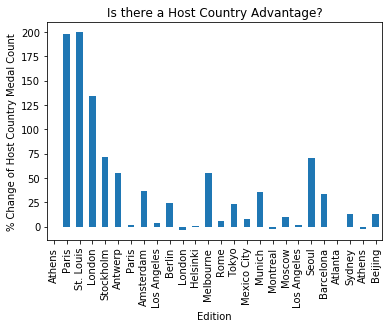

In [32]:
# Extract influence['Change']: change
change = influence['Change']

# Make bar plot of change: ax
ax = change.plot(kind='bar')

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City'])

# Display the plot
plt.show()